In [29]:
import numpy as np
np.set_printoptions(threshold=10000,suppress=True)
import pandas as pd
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')
import gc

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [30]:
def count_na(df) : 
    mask = df.isna().sum() > 0
    missing_values = df.isna().sum().sort_values(ascending=False)[mask]
    display(missing_values)
    
def count_na_percentage(df) : 
    mask = df.isna().sum() > 0
    missing_values_percentage = df.isna().sum().sort_values(ascending=False)[mask]/len(df)*100
    display(missing_values_percentage)

# Lecture des données

In [80]:
data=pd.read_excel('./donneeSite.xlsx', index_col="Insee")
data.head(3)

,Code_postal,Ville,Nb_habitants,Superficie,Pop_densite,Pop_active,Taux_chomage,Revenu_moyen,Prix_moyen,Note_global,...,Pharmacie,Maternelle,Primaire,Collège,Lycée,Securite,Education,Loisir / Sport,Environnement,Pratique
Insee,,,,,,,,,,,,,,,,,,,,,
1001,1400,L'Abergement-Clémenciat,767,16 km²,48 h/km²,49%,4.3%,22 228 €/an,1 938 €,NaN,...,0,1,1,0,0,NaN,NaN,NaN,NaN,NaN
1002,1640,L'Abergement-de-Varey,241,9 km²,27 h/km²,50.6%,4.1%,22 883 €/an,1 130 €,NaN,...,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN
1004,1500,Ambérieu-en-Bugey,14 127,25 km²,565 h/km²,47.5%,7.5%,19 735 €/an,2 005 €,3.8,...,6,5,4,2,2,4.0,3.8,3.8,4.0,3.3


In [32]:
data = data.drop(labels=["Securite", "Education","Loisir / Sport","Environnement","Pratique","Note_global","Code_postal","Insee"], axis=1)

In [33]:
data.dtypes

Nb_habitants                object
Superficie                  object
Pop_densite                 object
Pop_active                  object
Taux_chomage                object
Revenu_moyen                object
Prix_moyen                  object
Agriculteurs                 int64
Artisants/Commercants        int64
Cadres                       int64
Profession intermédiaire     int64
Employes                     int64
Ouvriers                     int64
Retraites                    int64
Sans emploie                 int64
0-14 ans                     int64
15-29 ans                    int64
30-44 ans                    int64
45-59 ans                    int64
60-74 ans                    int64
75-89 ans                    int64
90+ ans                      int64
Hypermarché                  int64
Supermarché                  int64
Boulangerie                  int64
Boucherie                    int64
Station service              int64
Banque                       int64
La poste            

In [34]:
data["Nb_habitants"] = data["Nb_habitants"].astype(str).str.replace('\s+', '').astype(int)

In [35]:
data

,Nb_habitants,Superficie,Pop_densite,Pop_active,Taux_chomage,Revenu_moyen,Prix_moyen,Agriculteurs,Artisants/Commercants,Cadres,...,Coiffeur,Vétérinaire,Restaurant,Médecin,Dentiste,Pharmacie,Maternelle,Primaire,Collège,Lycée
Ville,,,,,,,,,,,,,,,,,,,,,
L'Abergement-Clémenciat,767,16 km²,48 h/km²,49%,4.3%,22 228 €/an,1 938 €,2,3,10,...,0,0,1,0,0,0,1,1,0,0
L'Abergement-de-Varey,241,9 km²,27 h/km²,50.6%,4.1%,22 883 €/an,1 130 €,0,9,7,...,0,0,0,0,0,0,0,0,0,0
Ambérieu-en-Bugey,14127,25 km²,565 h/km²,47.5%,7.5%,19 735 €/an,2 005 €,0,2,6,...,23,2,38,176,15,6,5,4,2,2
Ambérieux-en-Dombes,1619,16 km²,101 h/km²,51.8%,4.1%,23 183 €/an,2 442 €,0,7,7,...,1,0,6,2,0,1,1,1,0,0
Ambléon,109,6 km²,18 h/km²,52.3%,7.3%,NC,1 155 €,0,0,5,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Villers-en-Arthies,508,8 km²,64 h/km²,51%,4.1%,26 675 €/an,2 150 €,0,4,6,...,0,0,0,0,0,0,0,1,0,0
Villiers-Adam,851,10 km²,85 h/km²,47.7%,4.1%,28 405 €/an,3 343 €,0,4,18,...,1,0,0,0,0,0,1,1,0,0
Villiers-le-Bel,27564,7 km²,3 938 h/km²,43.9%,9.6%,14 323 €/an,2 449 €,0,2,3,...,20,2,68,35,19,9,12,12,5,2


In [36]:
data["Superficie"] = data["Superficie"].astype(str).str.replace('km²', '').astype(int)

In [37]:
data["Pop_densite"] = data["Pop_densite"].astype(str).str.replace('\s+', '').str.replace('h/km²', '').astype(int)

In [38]:
data["Pop_active"] = data["Pop_active"].astype(str).str.replace('%', '').astype(float)

In [39]:
data["Taux_chomage"] = data["Taux_chomage"].astype(str).str.replace('%', '').astype(float)

In [40]:
data["Revenu_moyen"] = data["Revenu_moyen"].astype(str).str.replace('\s+', '').str.replace('€/an', '')
data["Revenu_moyen"] = data["Revenu_moyen"].replace('NC',np.nan).astype(float)

In [41]:
data["Prix_moyen"] = data["Prix_moyen"].astype(str).str.replace('\s+', '').str.replace('€', '').replace('NC',np.nan).astype(float)

In [42]:
data["Revenu_moyen"] = data["Revenu_moyen"].fillna(value=data["Revenu_moyen"].median())

In [43]:
data["Prix_moyen"] = data["Prix_moyen"].fillna(value=data["Prix_moyen"].median())


In [44]:
# Ne garder que les grandes villes 

# data = data[data["Nb_habitants"] > 10000]

# X


In [81]:
X = data.iloc[:,:].values
labels = data.index

In [46]:
SS = StandardScaler()
SS.fit(X)
Xnorm = SS.transform(X)

In [47]:
Xnorm[0,:]

array([-0.12724987,  0.03537153, -0.15741575,  0.48304514, -0.33546131,
        0.57172304,  0.47463783, -0.15337022, -0.16933455,  1.23688662,
        0.36738385,  0.10344826,  0.67036171, -0.69616759, -1.18103249,
        0.70578147, -0.08055015, -0.20531266,  0.82360153, -0.47628639,
       -0.45102466, -0.12693356, -0.17810873, -0.2177246 , -0.0451211 ,
       -0.20377779, -0.28801443, -0.16898073, -0.31883821, -0.20785758,
       -0.24522469, -0.11373812, -0.09579213, -0.12293785, -0.19330865,
       -0.01129824,  0.00151269, -0.21286896, -0.12995057])

In [48]:
pca=PCA(n_components=8)
pca.fit(Xnorm)

PCA(n_components=8)

In [49]:
pca.explained_variance_

array([15.78222917,  5.01031013,  2.23258264,  1.41834916,  1.35717325,
        1.1352643 ,  1.04863074,  0.99959909])

In [50]:
pca.explained_variance_ratio_

array([0.40466052, 0.12846567, 0.05724401, 0.03636685, 0.03479828,
       0.02910848, 0.02688717, 0.02562998])

In [51]:
pca.components_[0,:]

array([ 0.24602701,  0.05116097,  0.12633587, -0.00723028,  0.04446222,
       -0.00170619,  0.0581809 , -0.03236129, -0.01162521,  0.03272661,
        0.00607518,  0.01207232, -0.01592794, -0.01560715,  0.04325849,
        0.00464433,  0.06859484,  0.0071597 , -0.03124333, -0.02910343,
        0.00033104,  0.01608642,  0.17015874,  0.22881404,  0.24519637,
        0.23686832,  0.21089636,  0.2415055 ,  0.22762647,  0.24596871,
        0.21081263,  0.23388721,  0.22625727,  0.2344127 ,  0.24689058,
        0.23928537,  0.24152368,  0.237519  ,  0.2300175 ])

In [52]:
pca.components_[1,:]

array([-0.00952097,  0.10814086, -0.06533366, -0.3416953 ,  0.03426072,
       -0.22039904, -0.15195132,  0.11685535,  0.0223692 , -0.17523635,
       -0.23308633, -0.12796716, -0.07010375,  0.3466045 , -0.01734684,
       -0.32507205, -0.23817584, -0.32906167, -0.05719944,  0.31612617,
        0.35273539,  0.22421834,  0.01608963,  0.01367817,  0.01615899,
        0.0199807 ,  0.0268795 ,  0.01700327,  0.0272492 ,  0.01034383,
        0.02146772,  0.0128581 ,  0.0114742 ,  0.00540877,  0.01311193,
       -0.01015088, -0.0114255 ,  0.01886248,  0.0182499 ])

# Cercle de corrélation

Text(0.5, 1.0, 'Circle of Correlations')

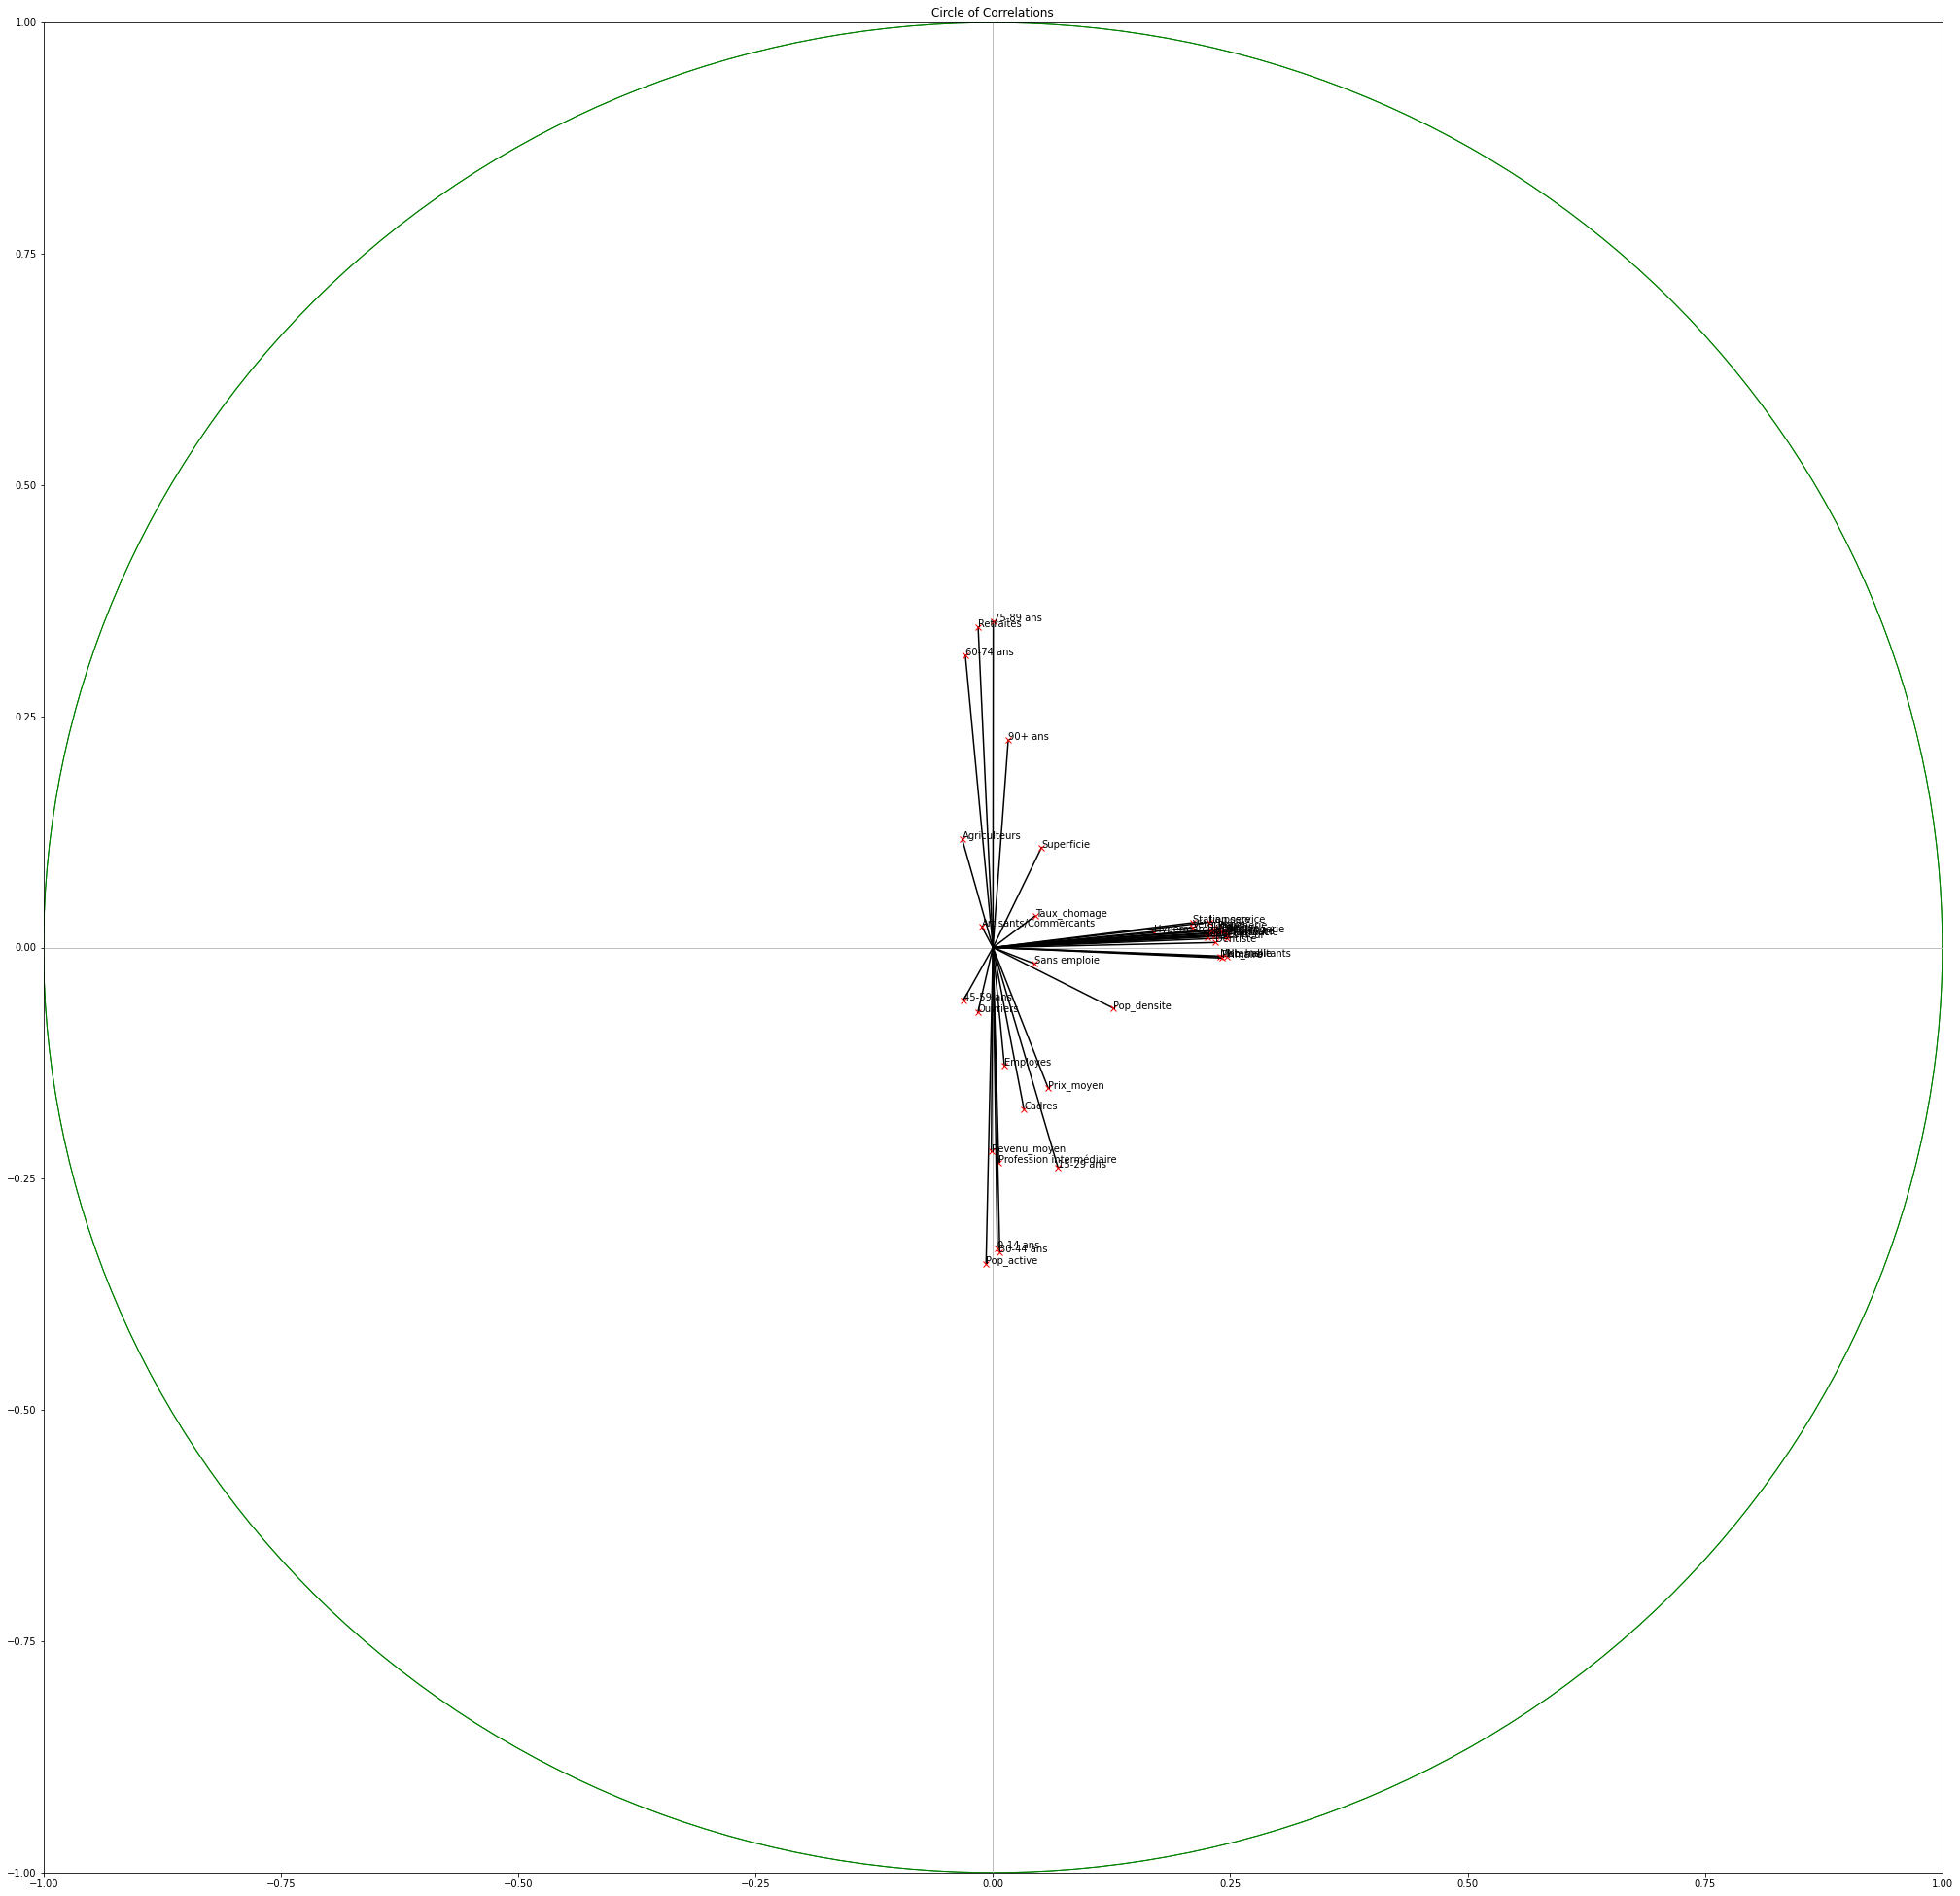

In [56]:
coef = np.transpose(pca.components_)
cols = ['y'+str(x+1) for x in range(8)]

pc_infos = pd.DataFrame(coef, columns=cols, index=data.iloc[:,:].columns)


plt.Circle((0,0),radius=10, color='g', fill=False)
circle1=plt.Circle((0,0),radius=1, color='g', fill=False)
# Ajouter les axes et donner la limite pour chaque axe
fig, axes= plt.subplots(figsize=(35,35))
axes.set_xlim(-1,1)
axes.set_ylim(-1,1)
fig.gca().add_artist(circle1)
plt.plot([-1,1],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-1,1],color='silver',linestyle='-',linewidth=1)
axes.add_artist(circle1)
# Affichage de chaque variable explicative dans la cercle
for idx in range(len(pc_infos["y1"])):
    x = pc_infos["y1"][idx]
    y = pc_infos["y2"][idx]
    plt.plot([0.0,x],[0.0,y],'k-')
    plt.plot(x, y, 'rx')
    plt.annotate(pc_infos.index[idx], xy=(x,y))
plt.xlim((-1,1))
plt.ylim((-1,1))
plt.title("Circle of Correlations")

In [57]:
X_pca=pca.transform(Xnorm)

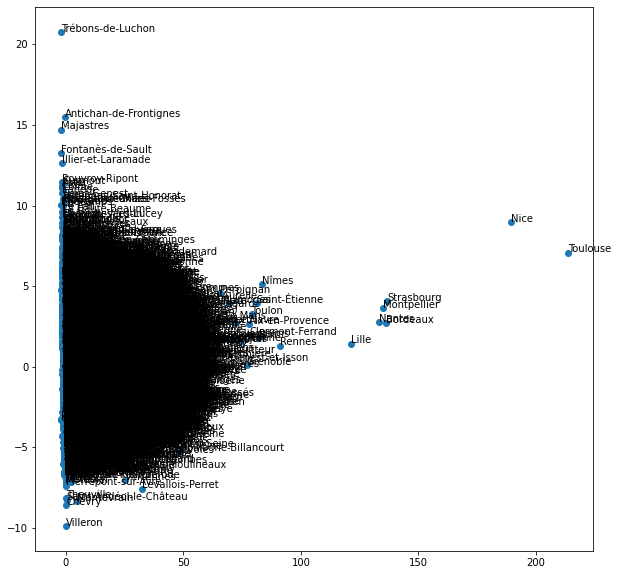

In [59]:
plt.figure(figsize=(10,10))
plt.scatter(X_pca[:, 0], X_pca[:, 1])
for label, x, y in zip(labels, X_pca[:, 0], X_pca[:, 1]):
    plt.annotate(label, xy=(x, y), xytext=(-0.2, 0.2), textcoords='offset points')
plt.show()

In [82]:
ar = []
for label, x, y in zip(labels, X_pca[:, 0], X_pca[:, 1]):
  ar.append([label,x,y])

pd.DataFrame(ar).to_csv("myfile.csv")

In [60]:
np.savetxt("mynuagedepoint.csv", [X_pca[:, 0], X_pca[:, 1]], delimiter=",")

In [83]:
pd.read_csv("myfile.csv")

,Unnamed: 0,0,1,2
0,0,1001,-0.682959,-1.541812
1,1,1002,-0.885700,-2.122502
2,2,1004,7.718921,-1.348827
3,3,1005,0.210332,-2.324439
4,4,1006,-0.838899,-0.238937
...,...,...,...,...
33656,33656,95676,-0.750923,-2.841446
33657,33657,95678,-0.423521,-2.475667
33658,33658,95680,10.893896,-2.256873
33659,33659,95682,-0.497641,-5.139137
